# Task 1- Handling missing values

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
import gc


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("application_data.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
49997,157874,0,Cash loans,F,N,Y,0,270000.0,820638.0,34897.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0


In [15]:
df[df["SK_ID_CURR"] == (157871 , 15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
49994,157871,0,Revolving loans\t,F,N,N,0,180000.0,1206000.0,45936.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
list(df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 46.5+ MB


In [41]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.00000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,...,0.008500,0.000700,0.000520,0.00038,0.007096,0.007512,0.032382,0.270288,0.260973,1.881035
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.944435,3.698533e+05,0.013761,4361.400270,140794.605668,...,0.091805,0.026449,0.022798,0.01949,0.087709,0.107992,0.194080,0.928560,0.606996,1.865054
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25184.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19644.000000,-2786.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15731.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12378.500000,-292.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.00000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [42]:
missing_data = df.isnull().sum()
missing_data

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6734
AMT_REQ_CREDIT_BUREAU_WEEK    6734
AMT_REQ_CREDIT_BUREAU_MON     6734
AMT_REQ_CREDIT_BUREAU_QRT     6734
AMT_REQ_CREDIT_BUREAU_YEAR    6734
Length: 122, dtype: int64

In [43]:
missing_proportion = missing_data / len(df)
missing_proportion

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.134683
AMT_REQ_CREDIT_BUREAU_WEEK    0.134683
AMT_REQ_CREDIT_BUREAU_MON     0.134683
AMT_REQ_CREDIT_BUREAU_QRT     0.134683
AMT_REQ_CREDIT_BUREAU_YEAR    0.134683
Length: 122, dtype: float64

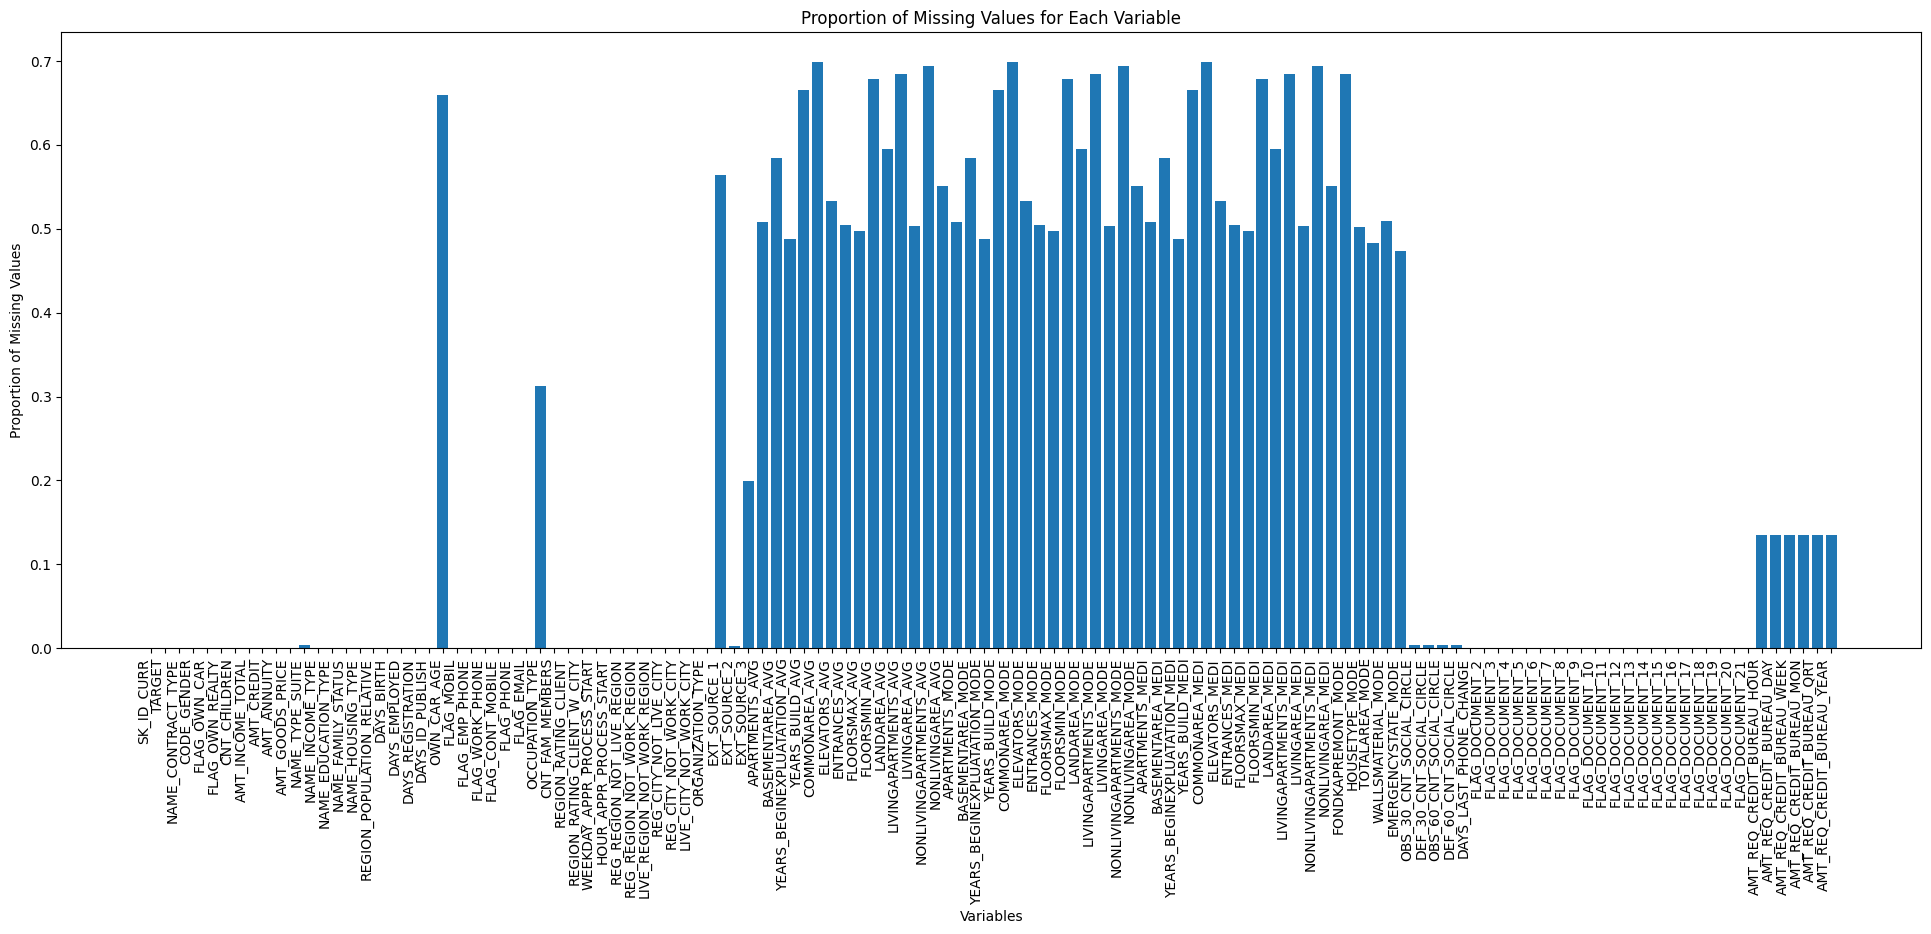

In [71]:
plt.figure(figsize=(24, 8))
plt.bar(missing_proportion.index, missing_proportion)
plt.title('Proportion of Missing Values for Each Variable')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.show()

In [45]:
df.isnull().sum()[0:60]

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        1
AMT_GOODS_PRICE                   38
NAME_TYPE_SUITE                  192
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    32950
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [46]:
df.isnull().sum()[60:120]

YEARS_BEGINEXPLUATATION_MODE    24394
YEARS_BUILD_MODE                33239
COMMONAREA_MODE                 34960
ELEVATORS_MODE                  26651
ENTRANCES_MODE                  25195
FLOORSMAX_MODE                  24875
FLOORSMIN_MODE                  33894
LANDAREA_MODE                   29721
LIVINGAPARTMENTS_MODE           34226
LIVINGAREA_MODE                 25137
NONLIVINGAPARTMENTS_MODE        34714
NONLIVINGAREA_MODE              27572
APARTMENTS_MEDI                 25385
BASEMENTAREA_MEDI               29199
YEARS_BEGINEXPLUATATION_MEDI    24394
YEARS_BUILD_MEDI                33239
COMMONAREA_MEDI                 34960
ELEVATORS_MEDI                  26651
ENTRANCES_MEDI                  25195
FLOORSMAX_MEDI                  24875
FLOORSMIN_MEDI                  33894
LANDAREA_MEDI                   29721
LIVINGAPARTMENTS_MEDI           34226
LIVINGAREA_MEDI                 25137
NONLIVINGAPARTMENTS_MEDI        34714
NONLIVINGAREA_MEDI              27572
FONDKAPREMON

In [47]:
df.isnull().sum()[120:]

AMT_REQ_CREDIT_BUREAU_QRT     6734
AMT_REQ_CREDIT_BUREAU_YEAR    6734
dtype: int64

In [48]:
column_names = df.columns
list(column_names)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [49]:
for i in column_names:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [50]:
df.isnull().sum()[0:60]

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RAT

In [51]:
df.isnull().sum()[60:120]

YEARS_BEGINEXPLUATATION_MODE    0
YEARS_BUILD_MODE                0
COMMONAREA_MODE                 0
ELEVATORS_MODE                  0
ENTRANCES_MODE                  0
FLOORSMAX_MODE                  0
FLOORSMIN_MODE                  0
LANDAREA_MODE                   0
LIVINGAPARTMENTS_MODE           0
LIVINGAREA_MODE                 0
NONLIVINGAPARTMENTS_MODE        0
NONLIVINGAREA_MODE              0
APARTMENTS_MEDI                 0
BASEMENTAREA_MEDI               0
YEARS_BEGINEXPLUATATION_MEDI    0
YEARS_BUILD_MEDI                0
COMMONAREA_MEDI                 0
ELEVATORS_MEDI                  0
ENTRANCES_MEDI                  0
FLOORSMAX_MEDI                  0
FLOORSMIN_MEDI                  0
LANDAREA_MEDI                   0
LIVINGAPARTMENTS_MEDI           0
LIVINGAREA_MEDI                 0
NONLIVINGAPARTMENTS_MEDI        0
NONLIVINGAREA_MEDI              0
FONDKAPREMONT_MODE              0
HOUSETYPE_MODE                  0
TOTALAREA_MODE                  0
WALLSMATERIAL_

In [52]:
df.isnull().sum()[120:]

AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

# Task 2 - Detect and identify outliers in the dataset

In [53]:
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = (column < Q1 - threshold * IQR) | (column > Q3 + threshold * IQR)
    return outliers

# Iterate through each continuous column and identify outliers
outliers_dict = {}
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        outliers_dict[column] = identify_outliers(df[column])

# Create a DataFrame to store the outlier information
outliers_df = pd.DataFrame(outliers_dict)

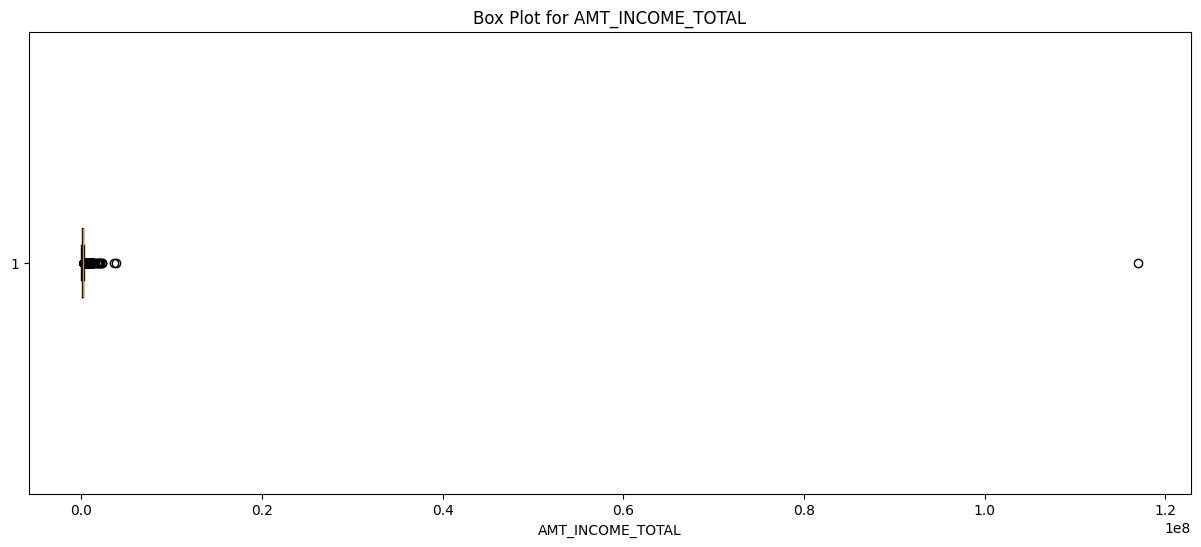

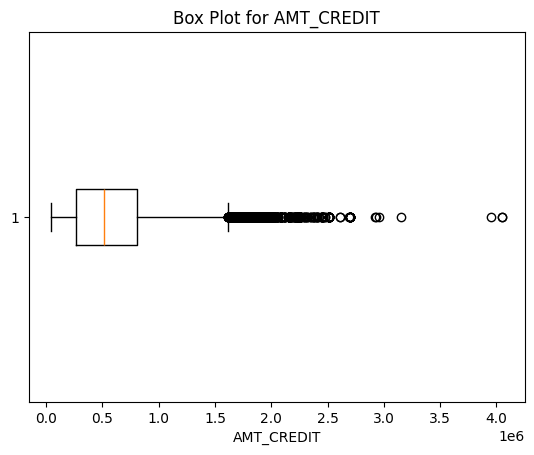

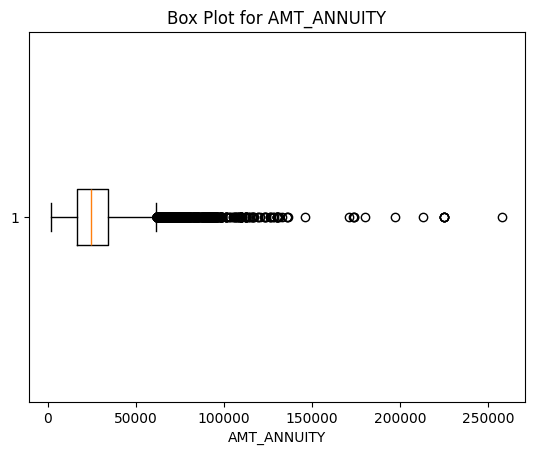

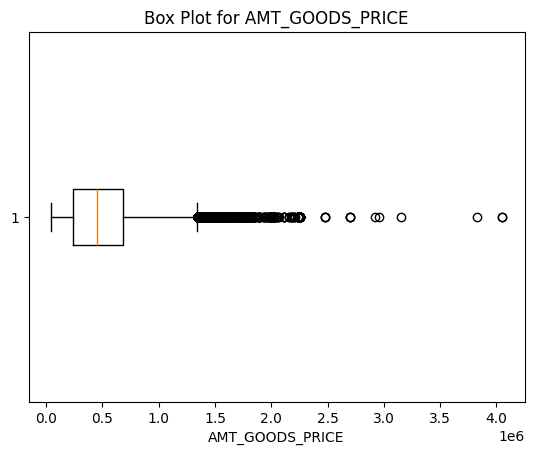

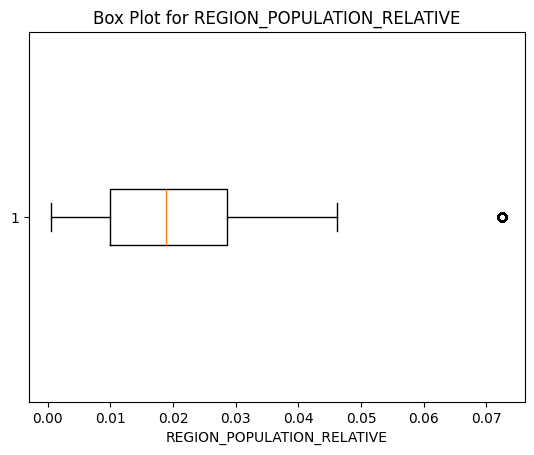

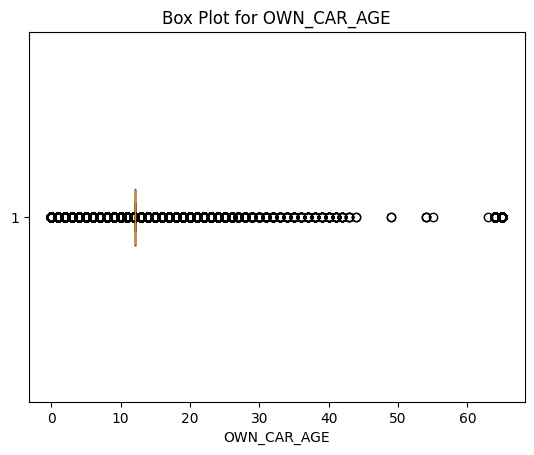

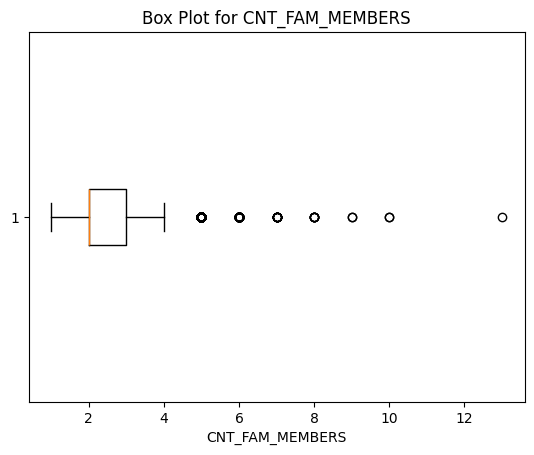

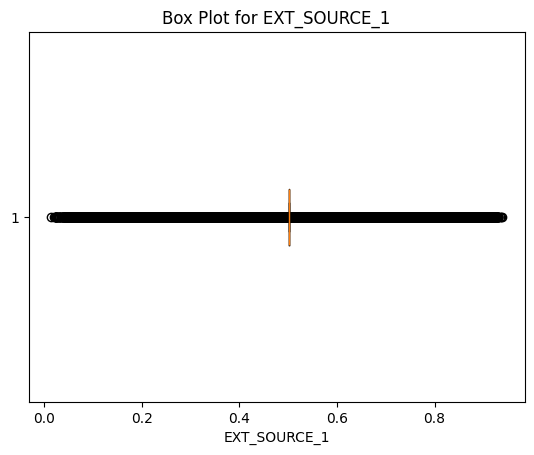

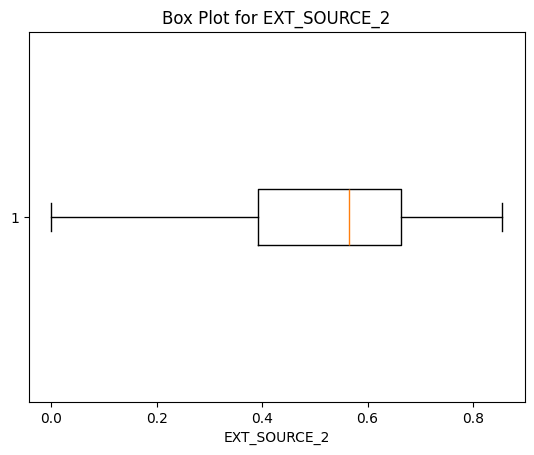

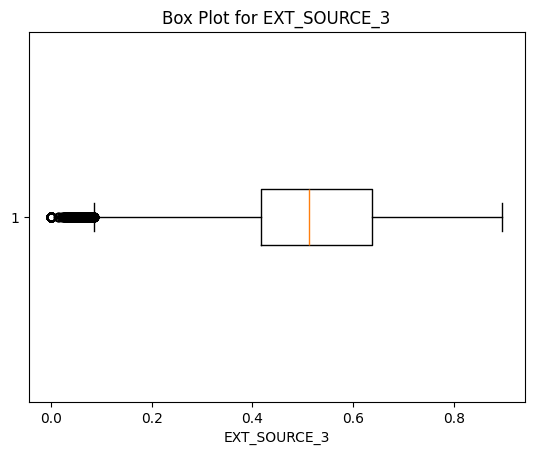

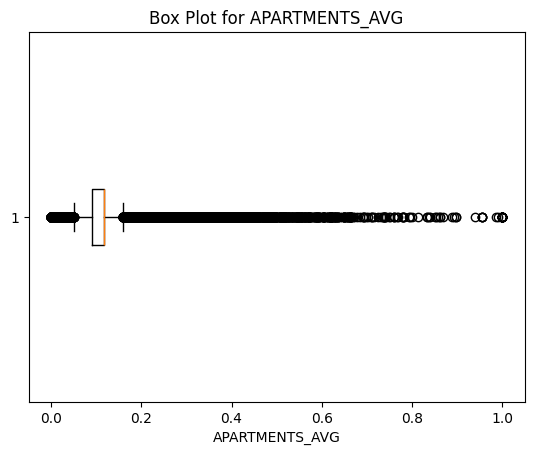

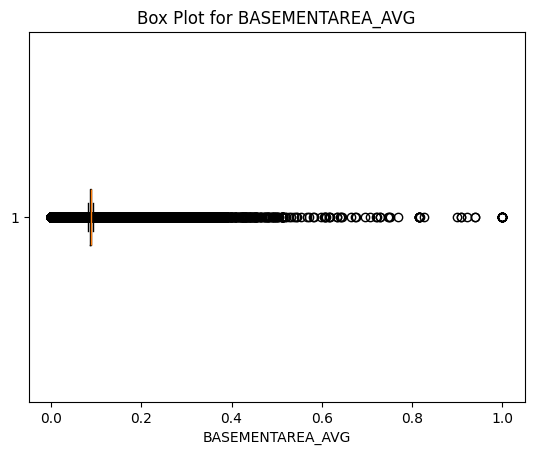

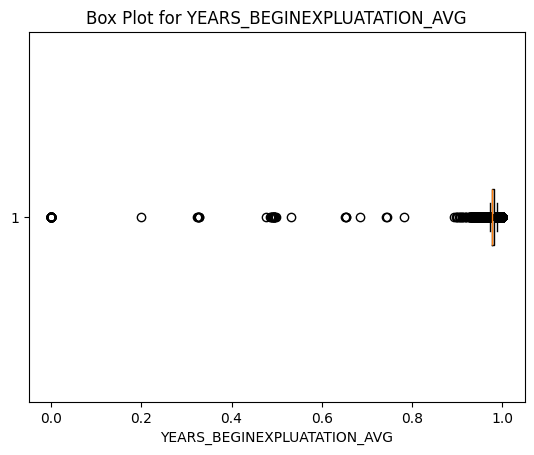

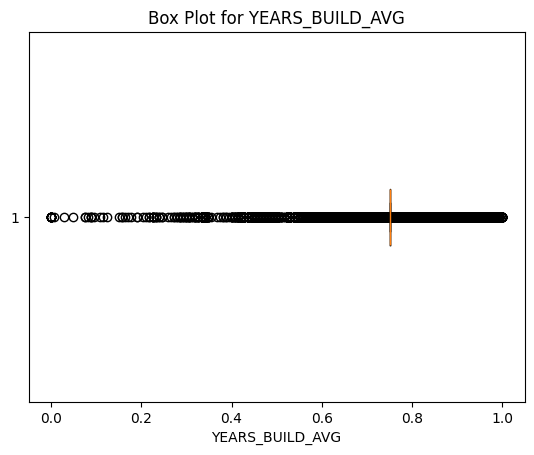

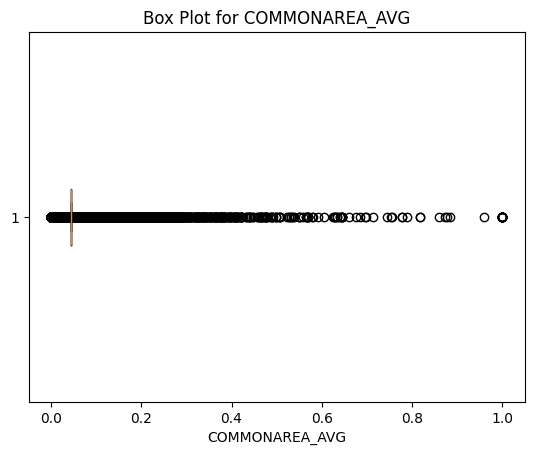

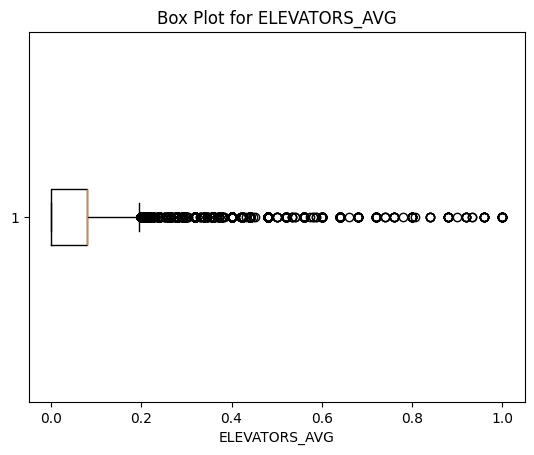

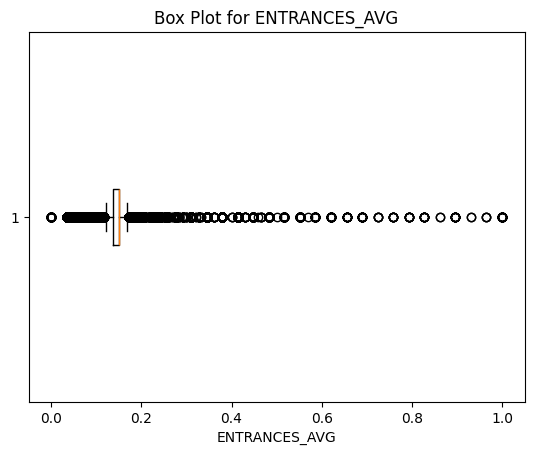

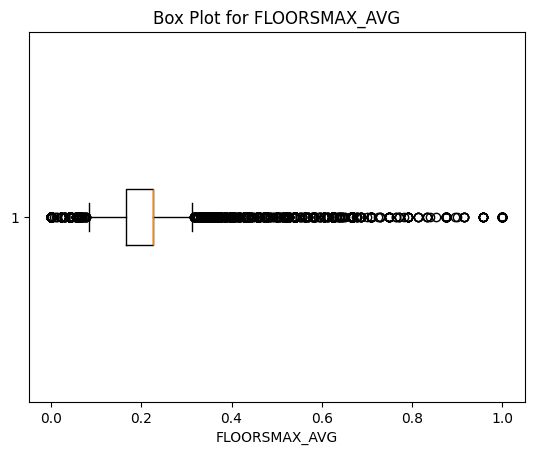

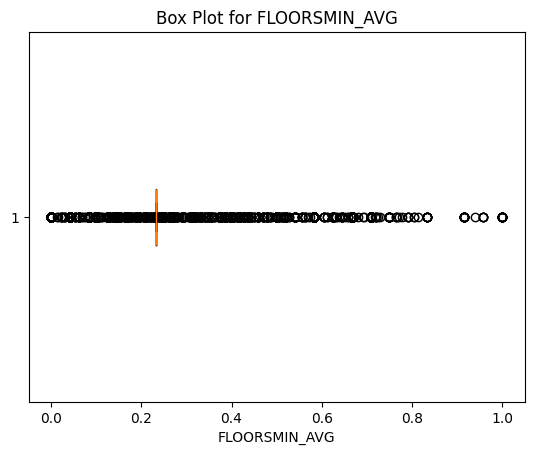

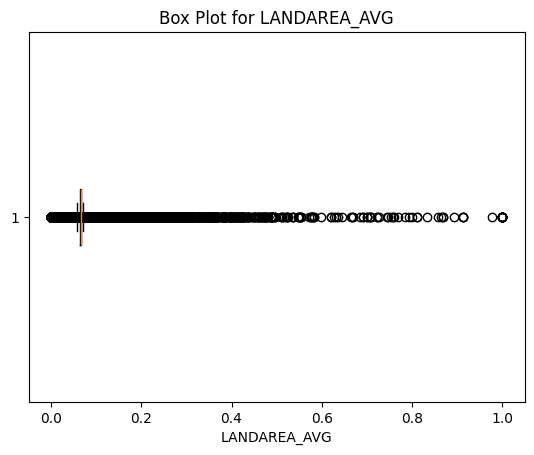

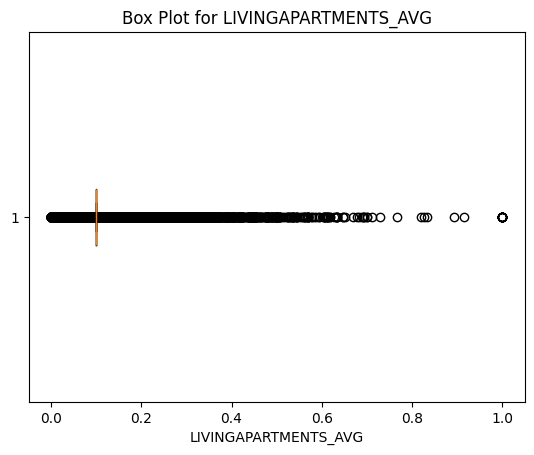

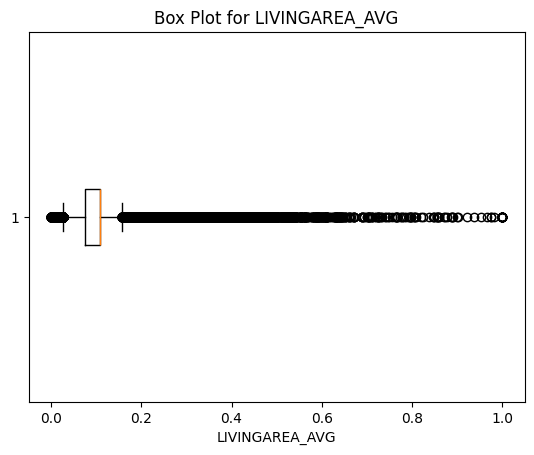

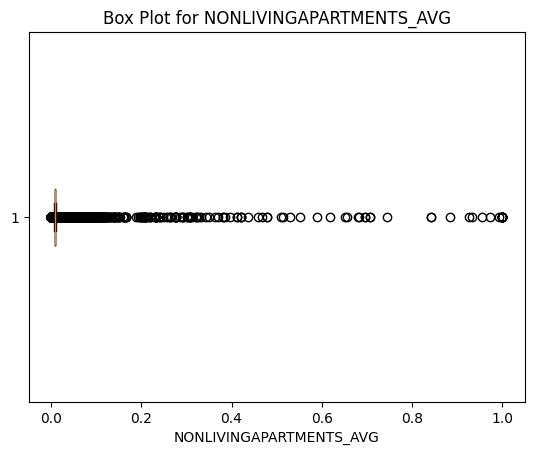

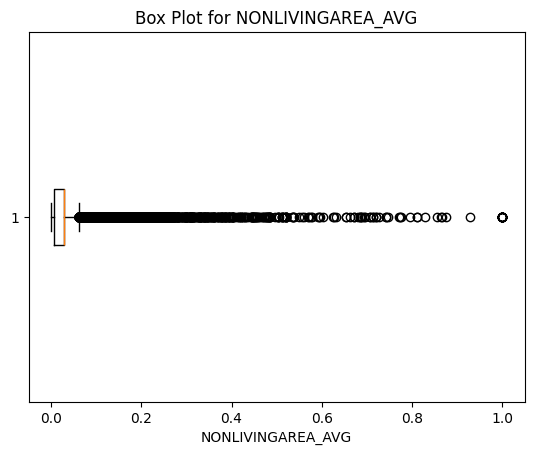

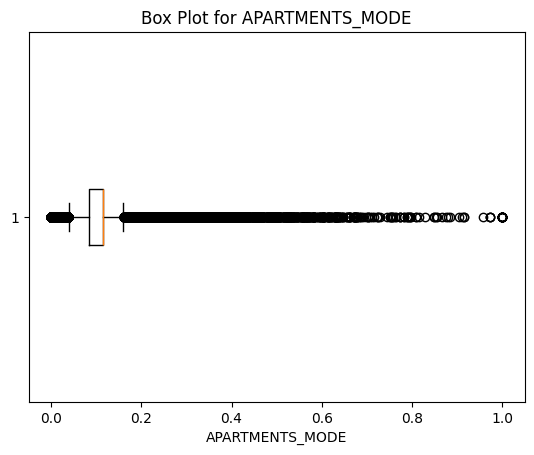

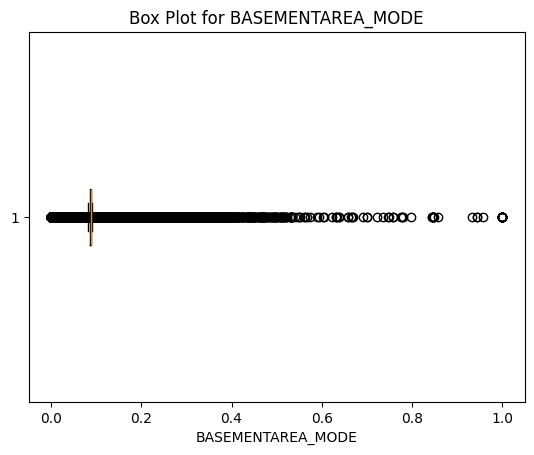

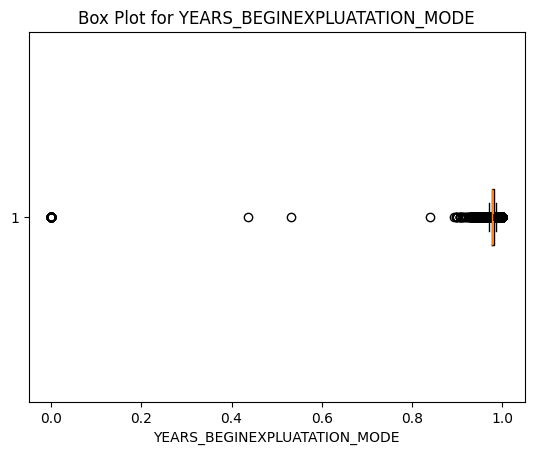

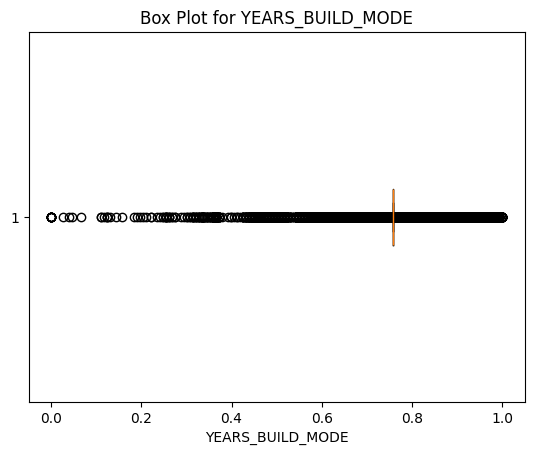

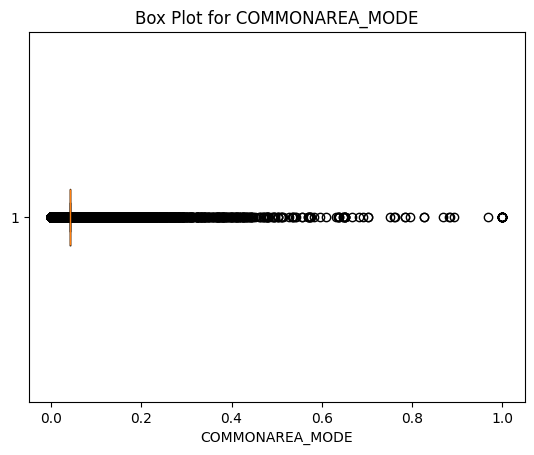

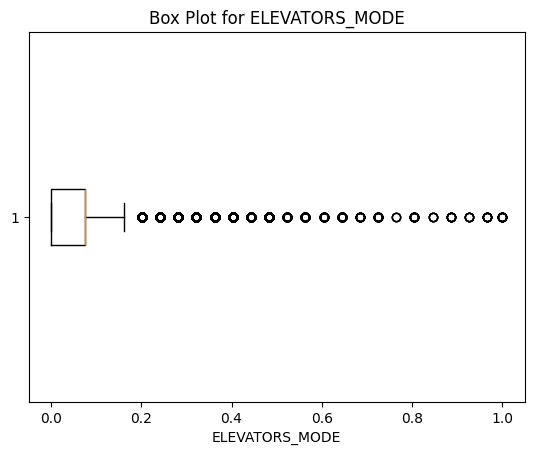

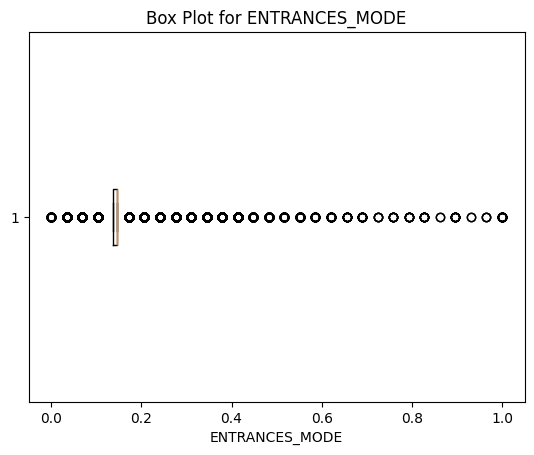

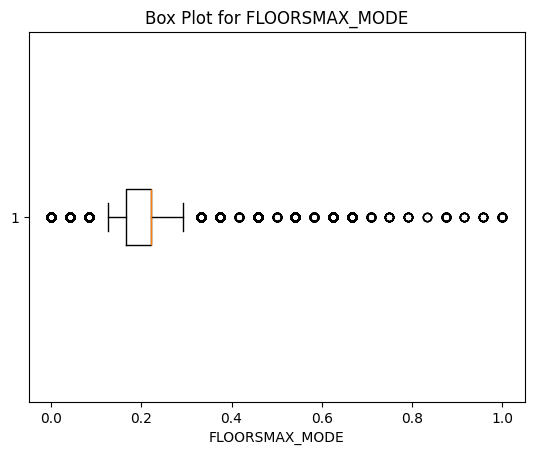

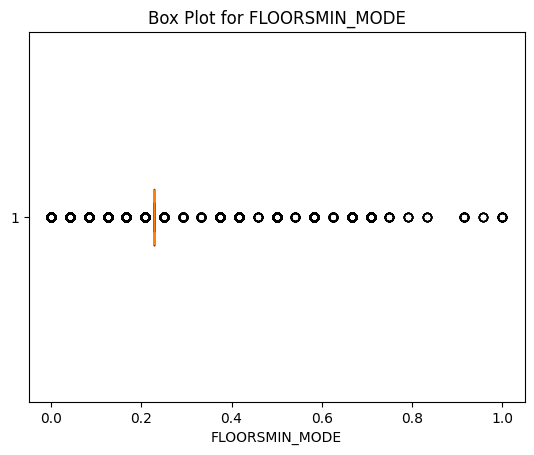

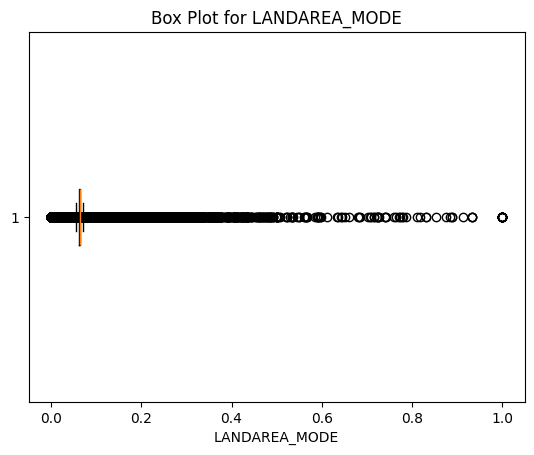

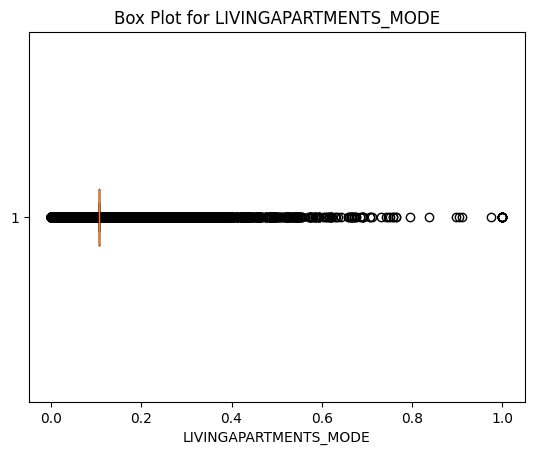

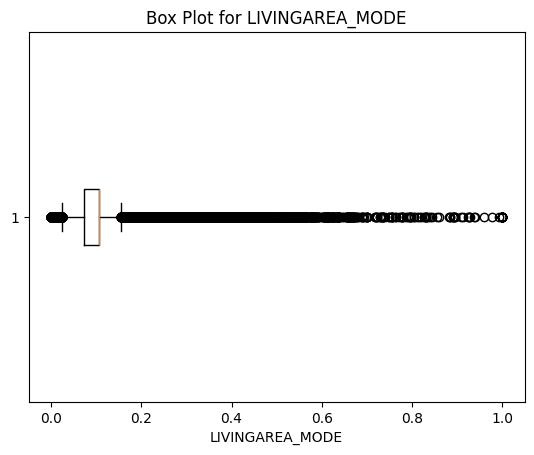

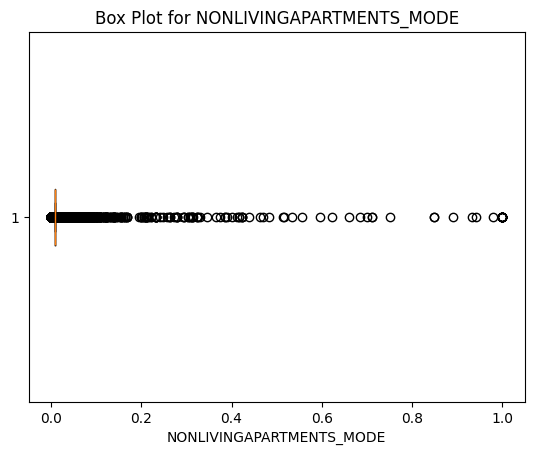

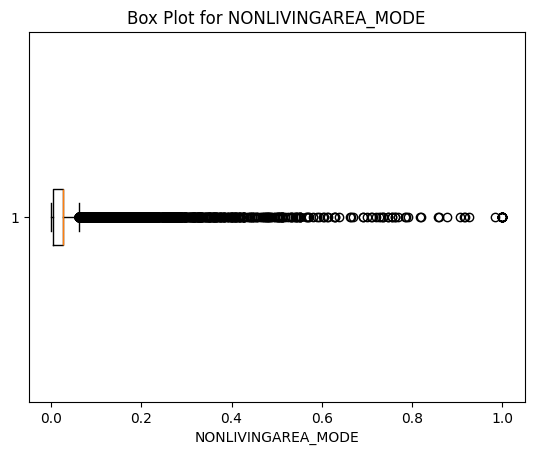

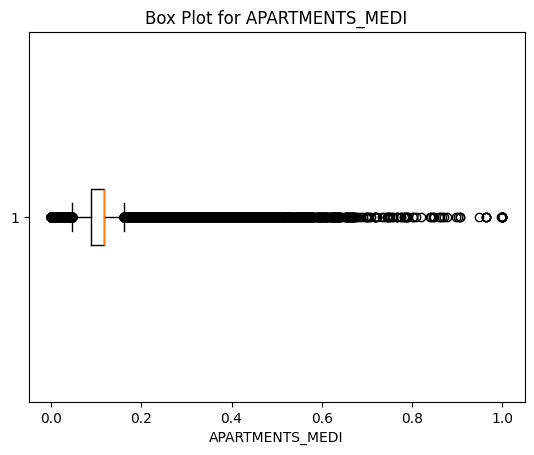

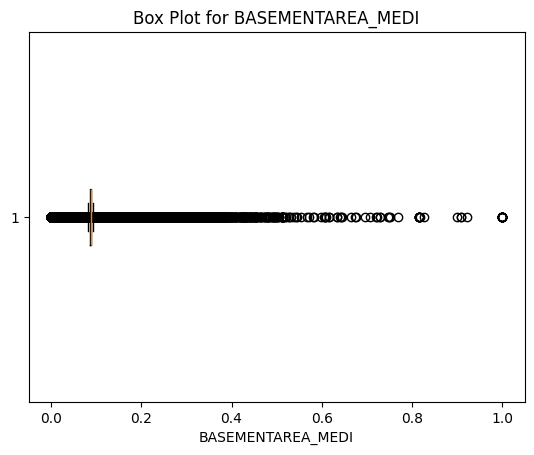

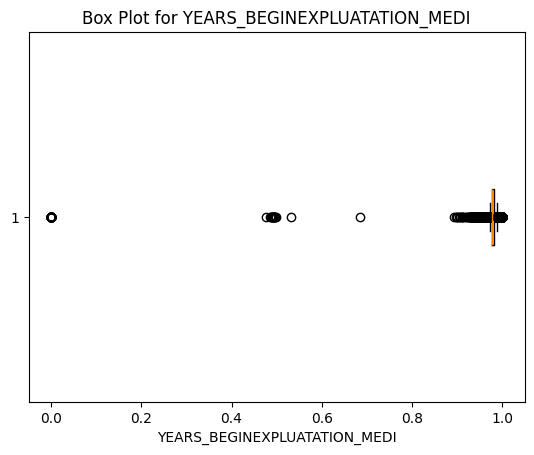

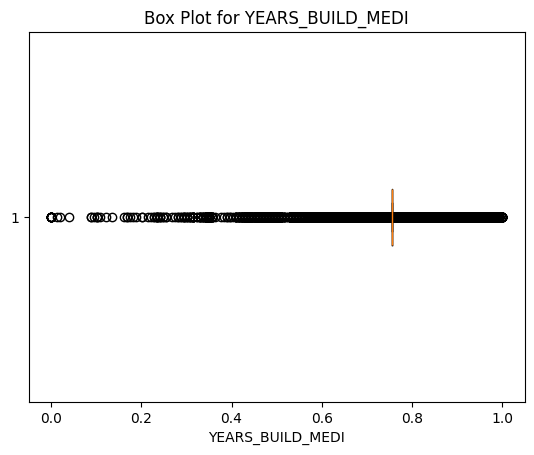

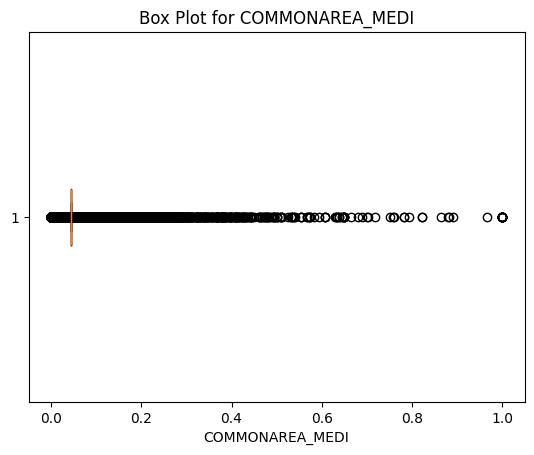

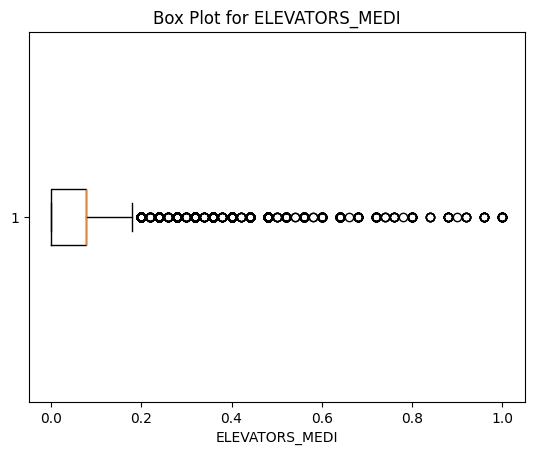

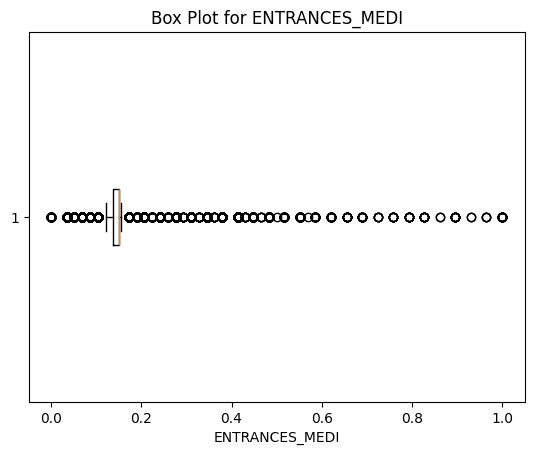

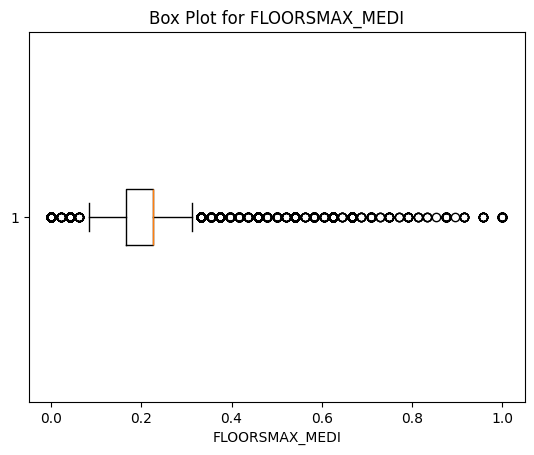

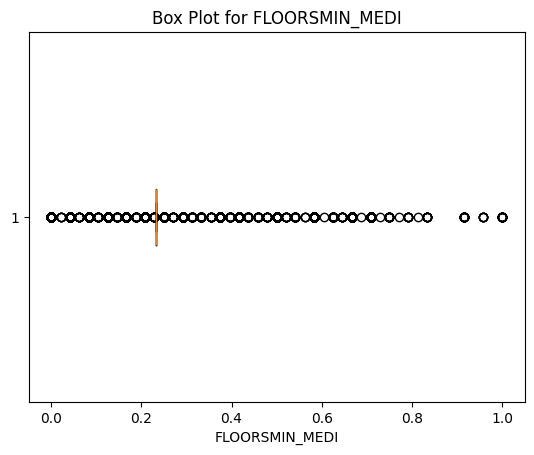

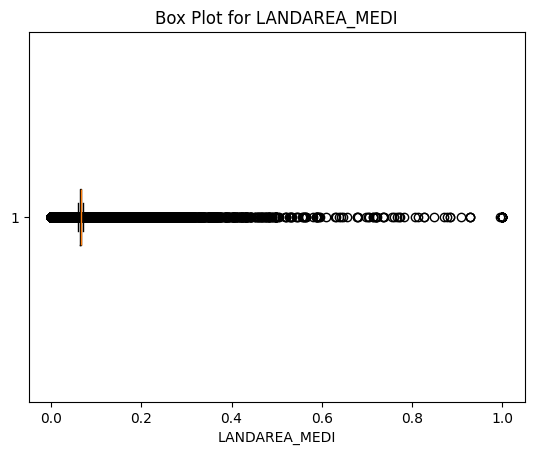

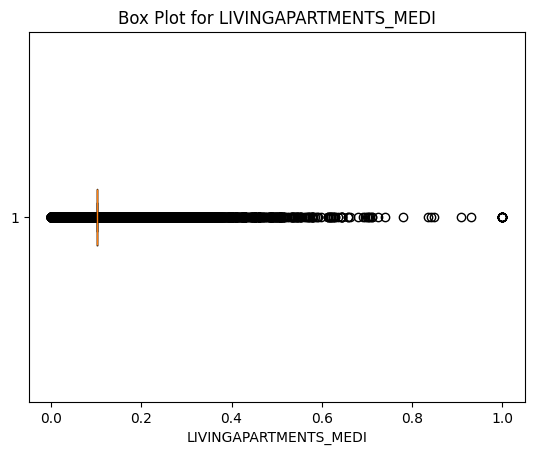

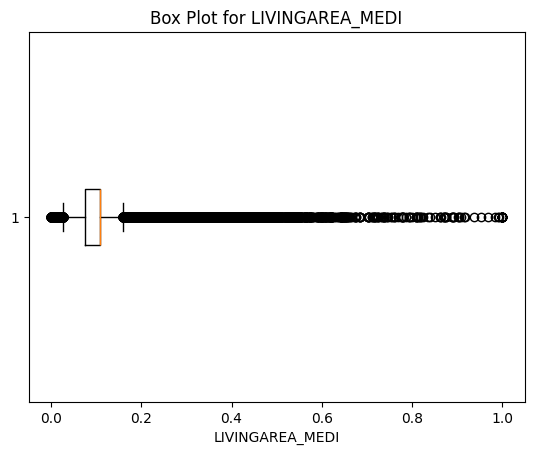

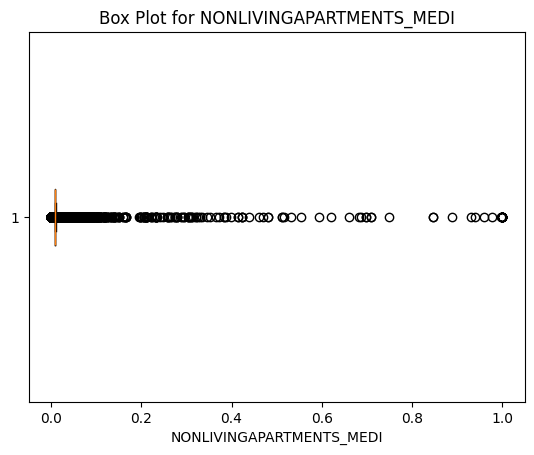

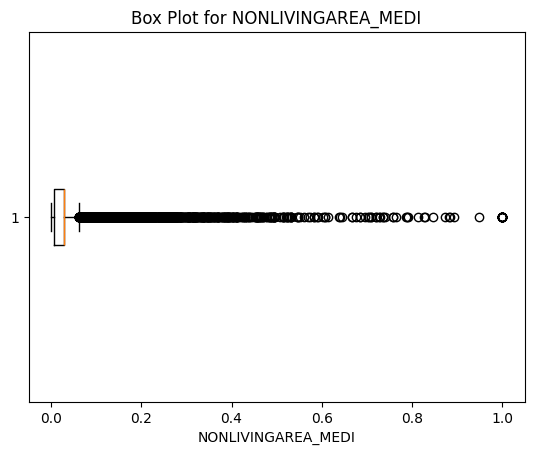

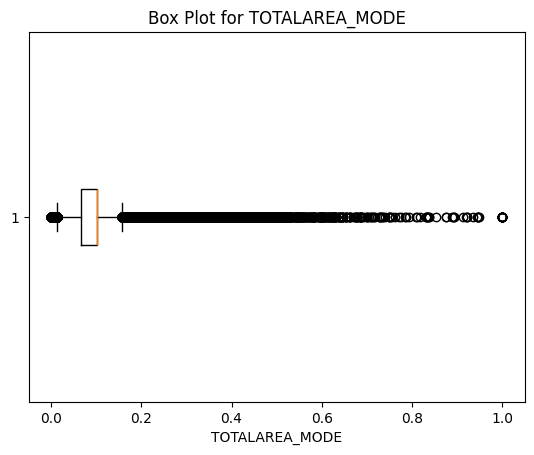

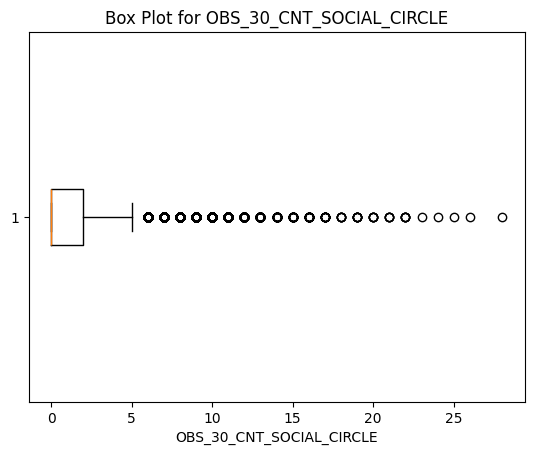

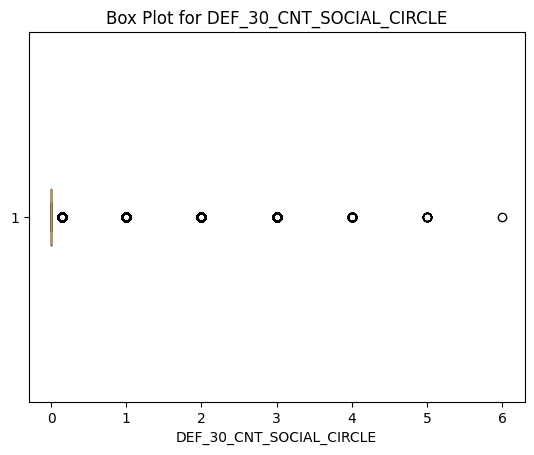

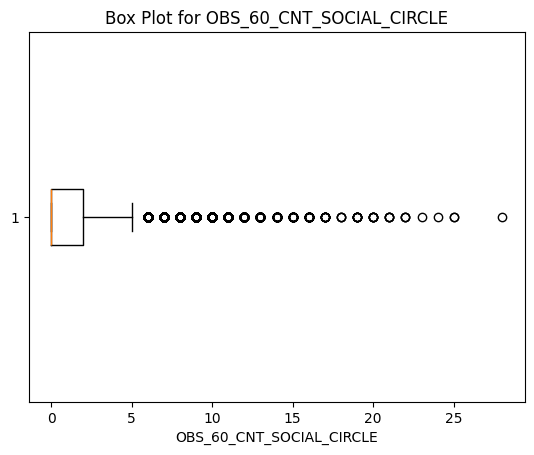

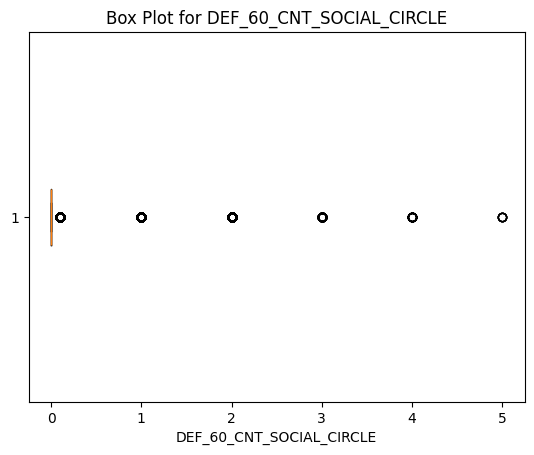

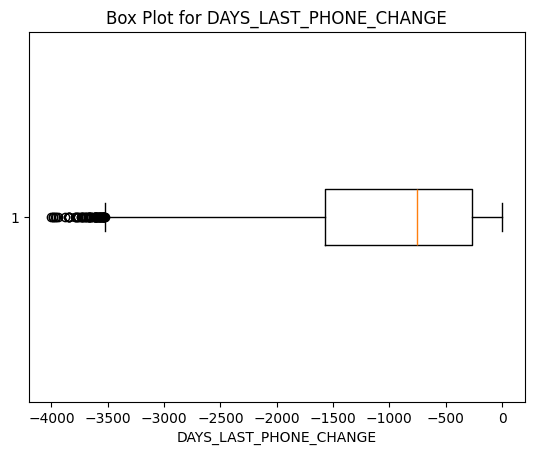

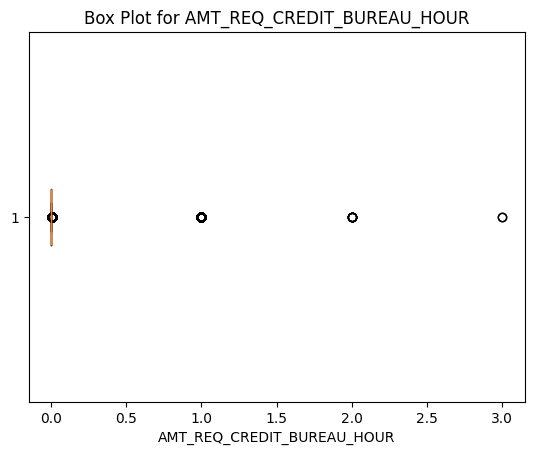

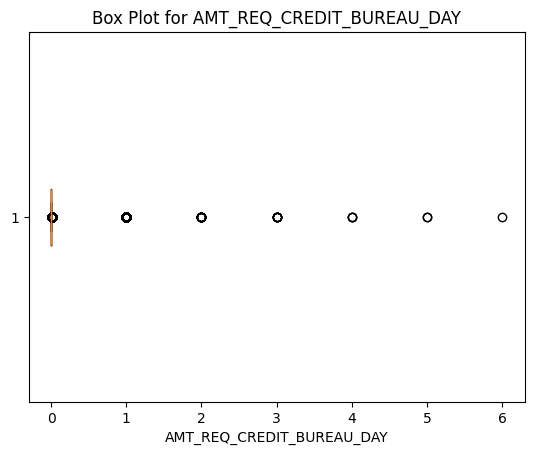

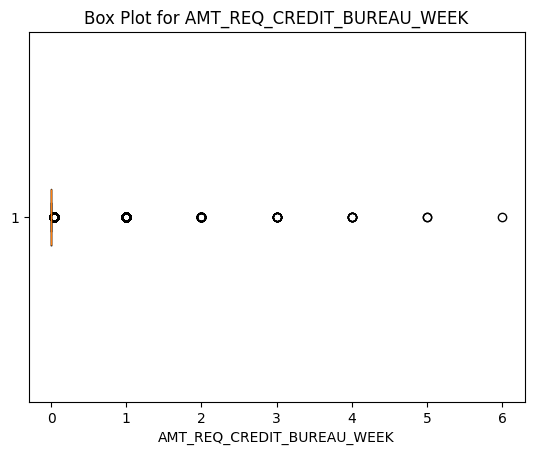

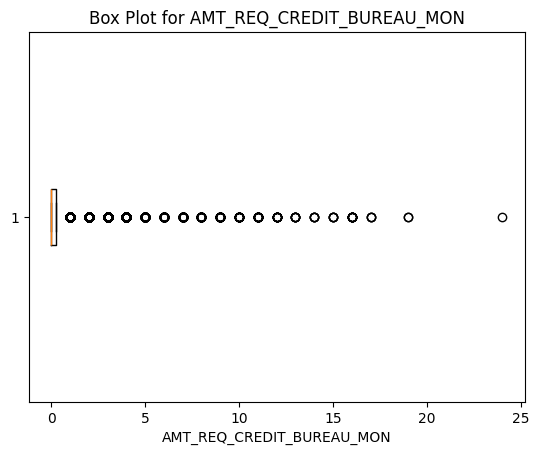

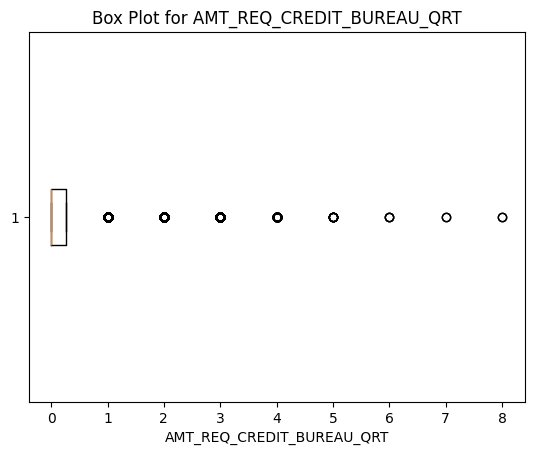

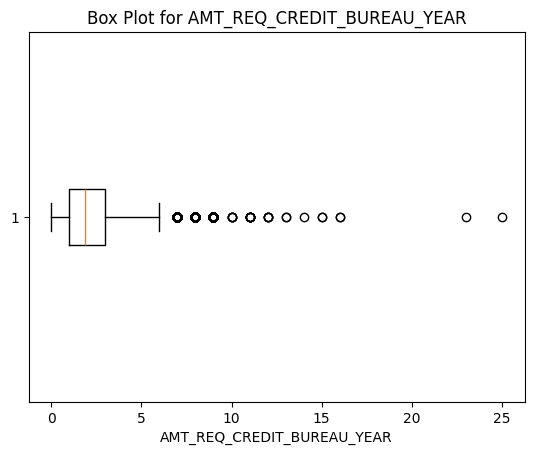

In [54]:
plt.figure(figsize=(15, 6))

for column in df.columns:
    if df[column].dtype in [float, int]:  
        plt.boxplot(df[column], vert=False)
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()

# Task 3 - Determine if there is data imbalance in the loan application dataset and calculate the ratio of data imbalance

In [55]:
class_counts = df['TARGET'].value_counts()

# Calculate ratios
class_ratios = class_counts / len(df)

print("Class Counts:")
print(class_counts)

print("\nClass Ratios:")
print(class_ratios)


Class Counts:
0    45973
1     4026
Name: TARGET, dtype: int64

Class Ratios:
0    0.919478
1    0.080522
Name: TARGET, dtype: float64


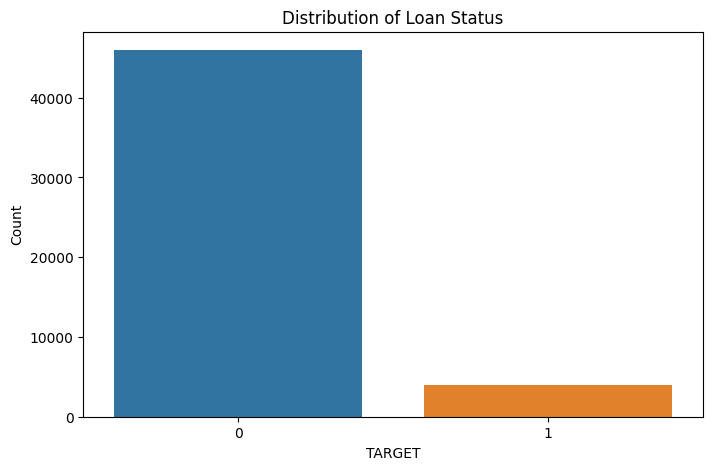

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()


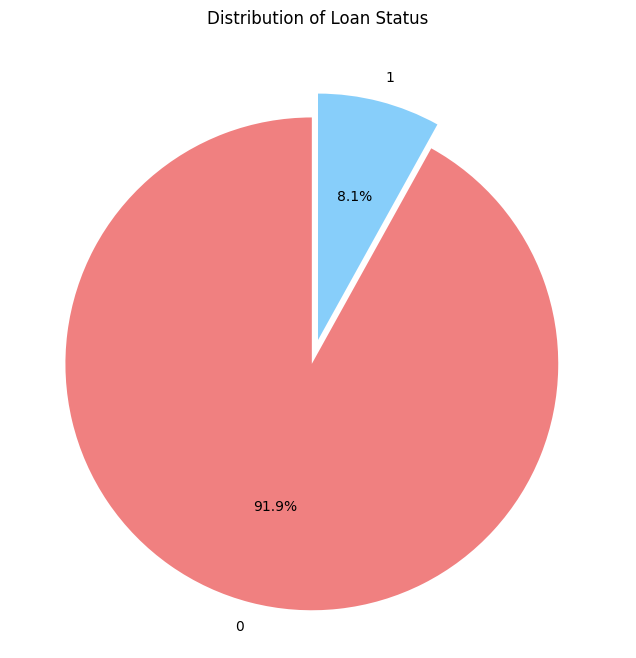

In [57]:
class_counts = df['TARGET'].value_counts()

# Calculate ratios
class_ratios = class_counts / len(df)

# Create a pie chart
plt.figure(figsize=(8, 8))
explode = (0.1, 0)  # Explode the first slice to highlight class imbalance
colors = ['lightcoral', 'lightskyblue']

plt.pie(class_ratios, labels=class_ratios.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
plt.title('Distribution of Loan Status')
plt.show()


# Task 4 - Perform Univariate, Segmented Univariate, and Bivariate Analysis

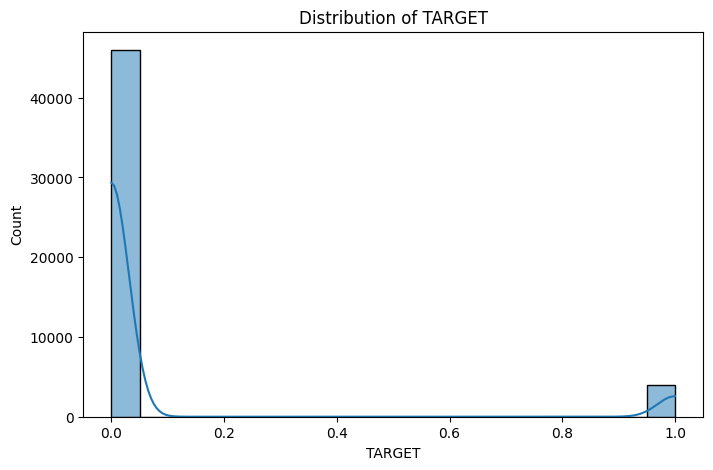

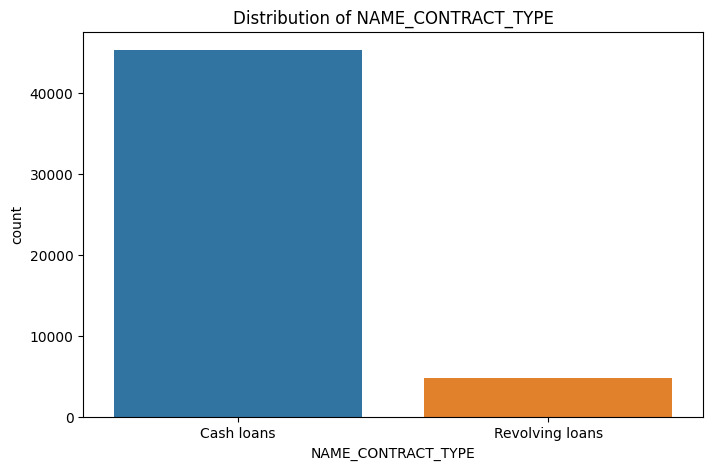

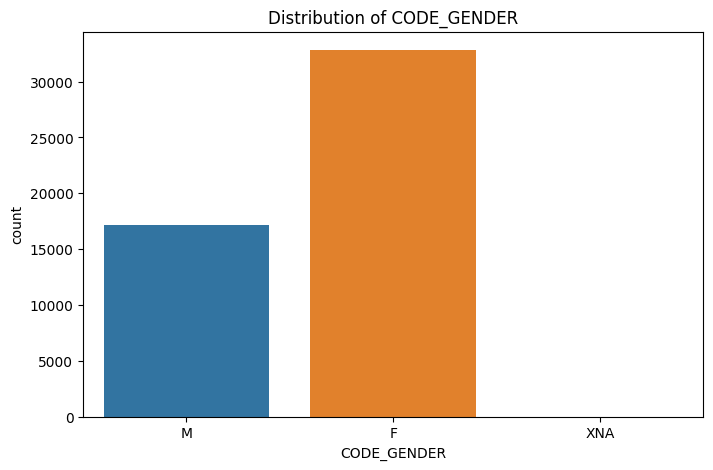

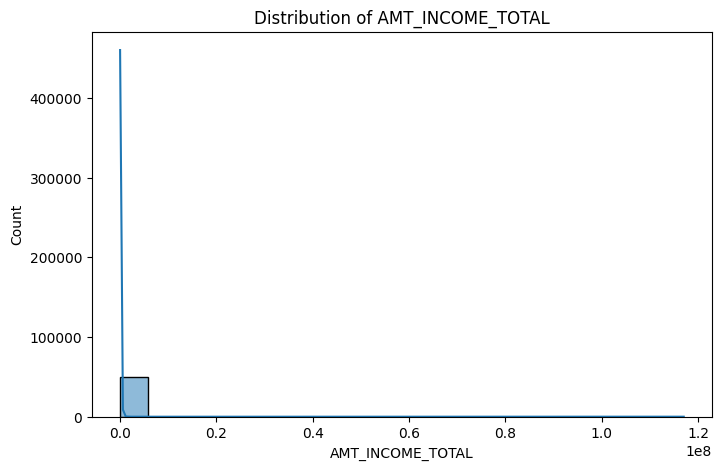

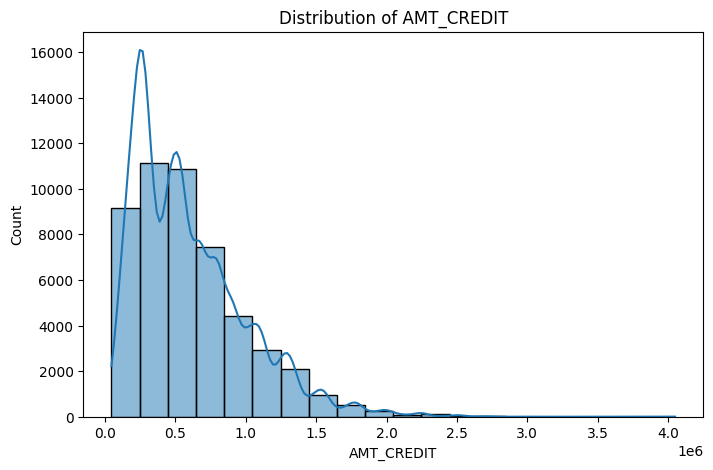

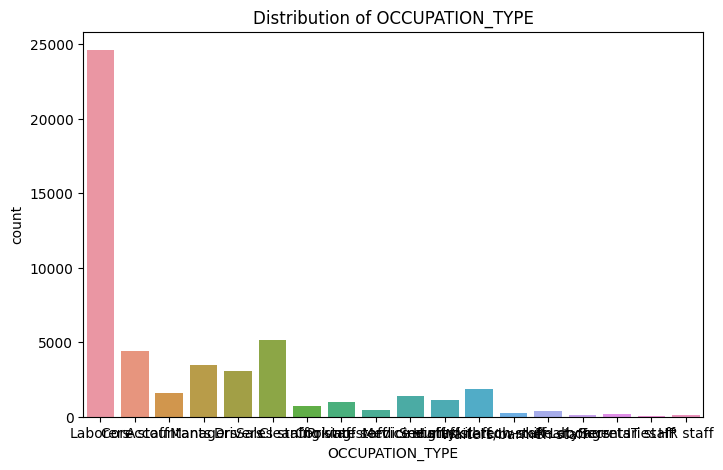

In [58]:
# Extract a few representative columns for analysis
columns_of_interest = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'OCCUPATION_TYPE']

# Univariate Analysis - Distribution of Individual Variables
for column in columns_of_interest:
    plt.figure(figsize=(8, 5))
    if df[column].dtype == 'object':
        # For categorical variables, create a bar plot
        sns.countplot(x=column, data=df)
    else:
        # For numerical variables, create a histogram
        sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

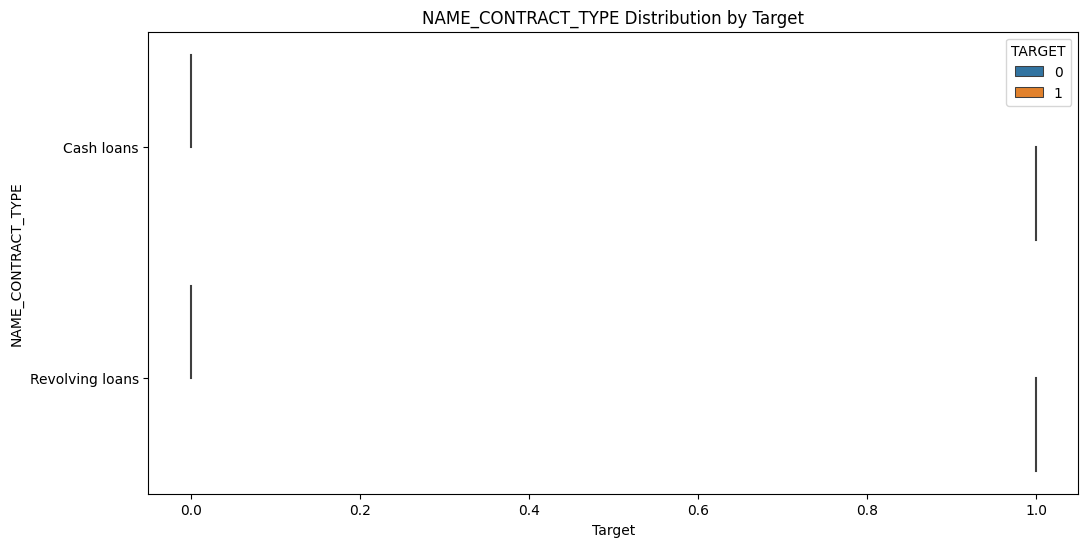

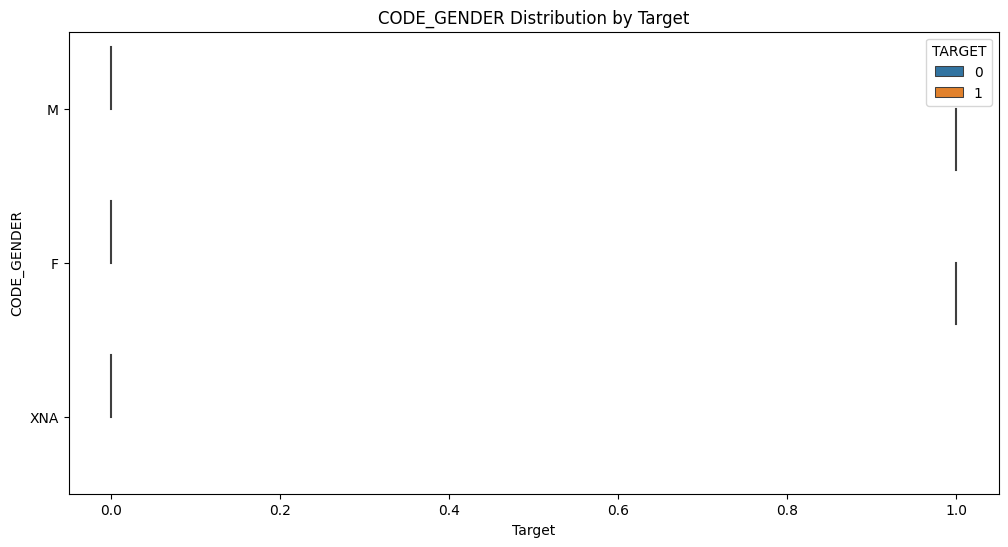

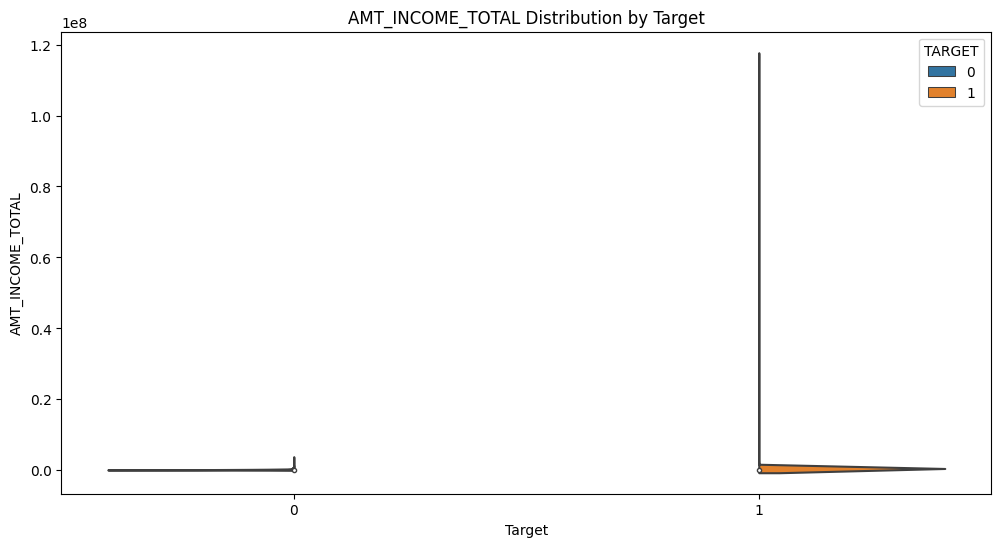

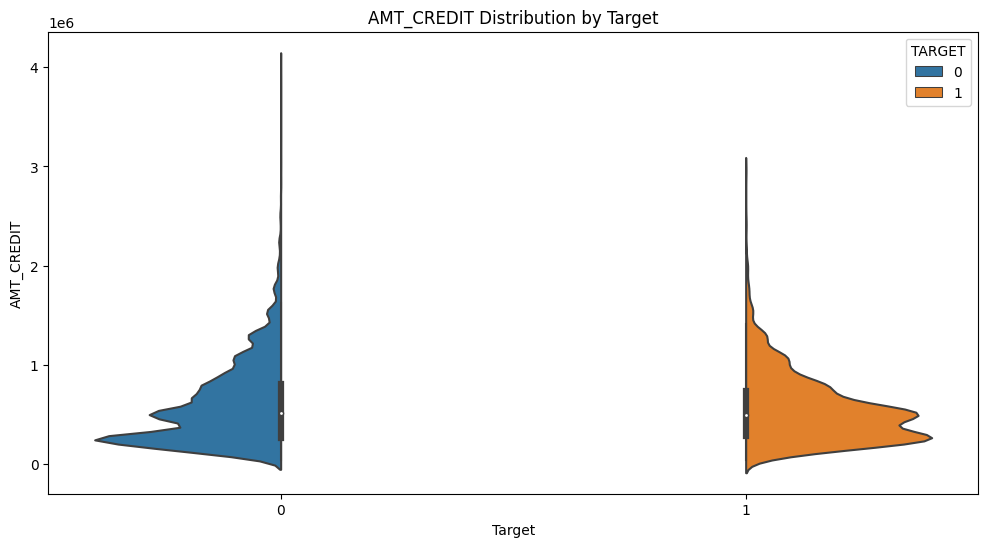

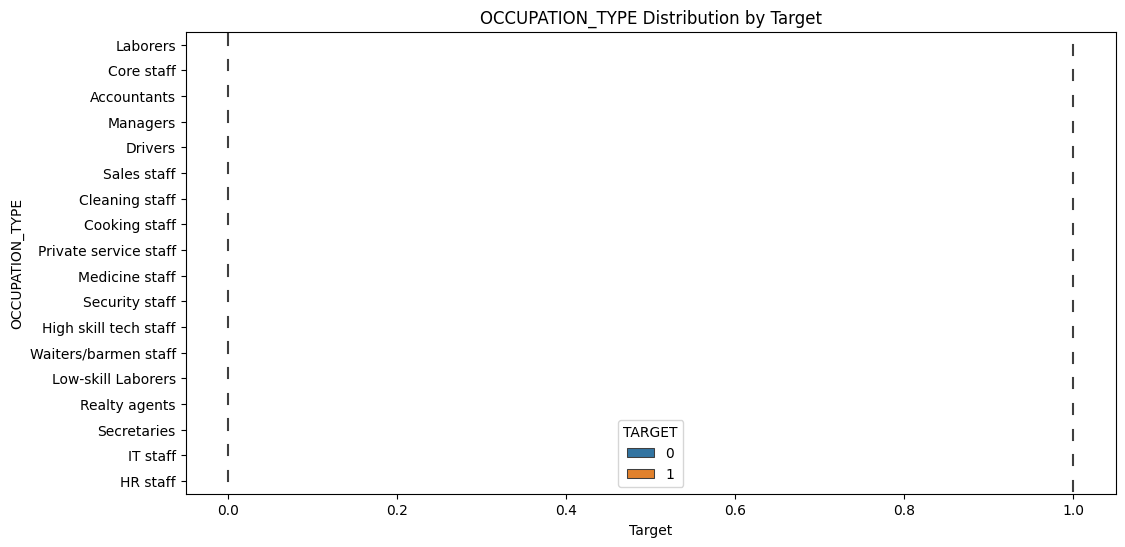

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for detailed segment analysis
numerical_columns_for_segment = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'OCCUPATION_TYPE']

# Perform segment analysis by target variable using violin plots
for column in numerical_columns_for_segment:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='TARGET', y=column, data=df, hue='TARGET', split=True)
    plt.title(f'{column} Distribution by Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()


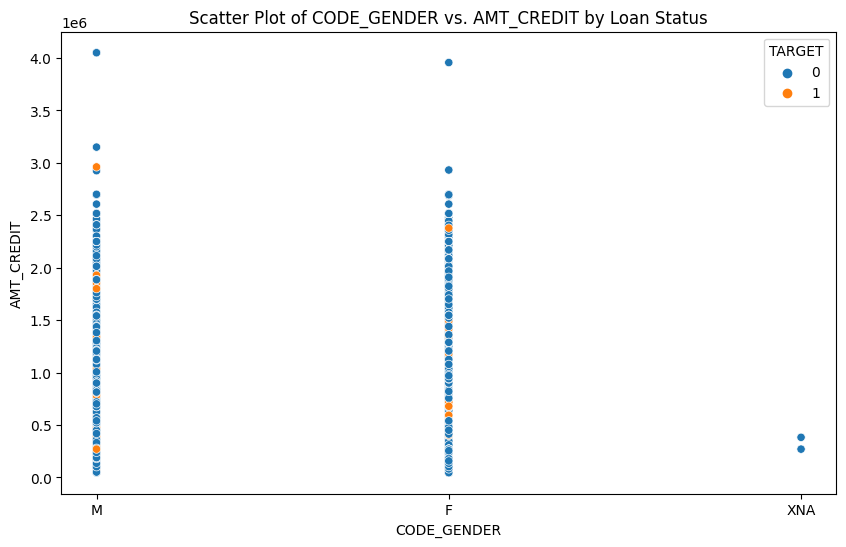

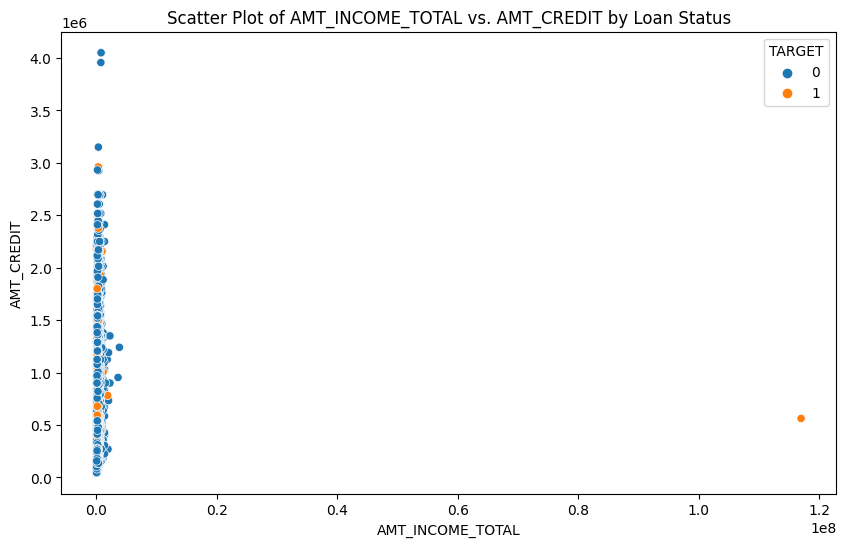

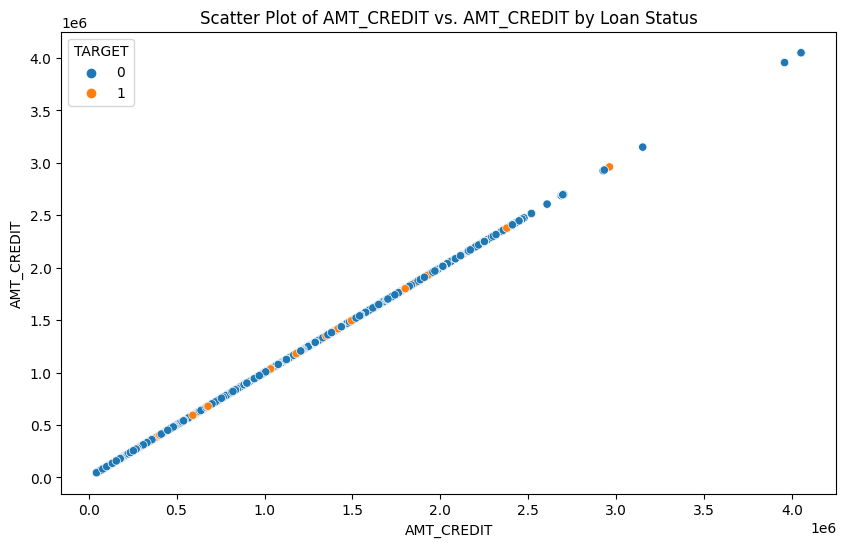

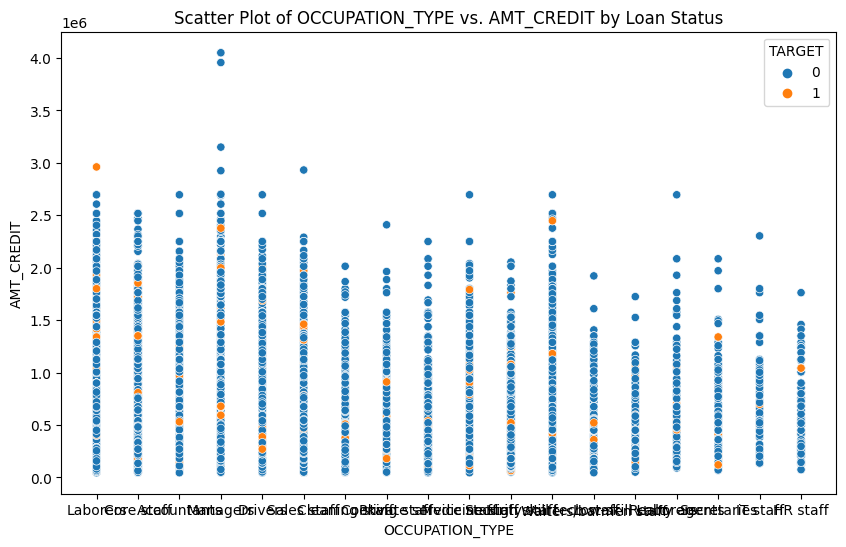

In [60]:
# Bivariate Analysis - Explore Relationships Between Variables and the Target Variable
for column in columns_of_interest[2:]:  # Skip the target and contract type variables for bivariate analysis
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y='AMT_CREDIT', hue='TARGET', data=df)
    plt.title(f'Scatter Plot of {column} vs. AMT_CREDIT by Loan Status')
    plt.xlabel(column)
    plt.ylabel('AMT_CREDIT')
    plt.show()

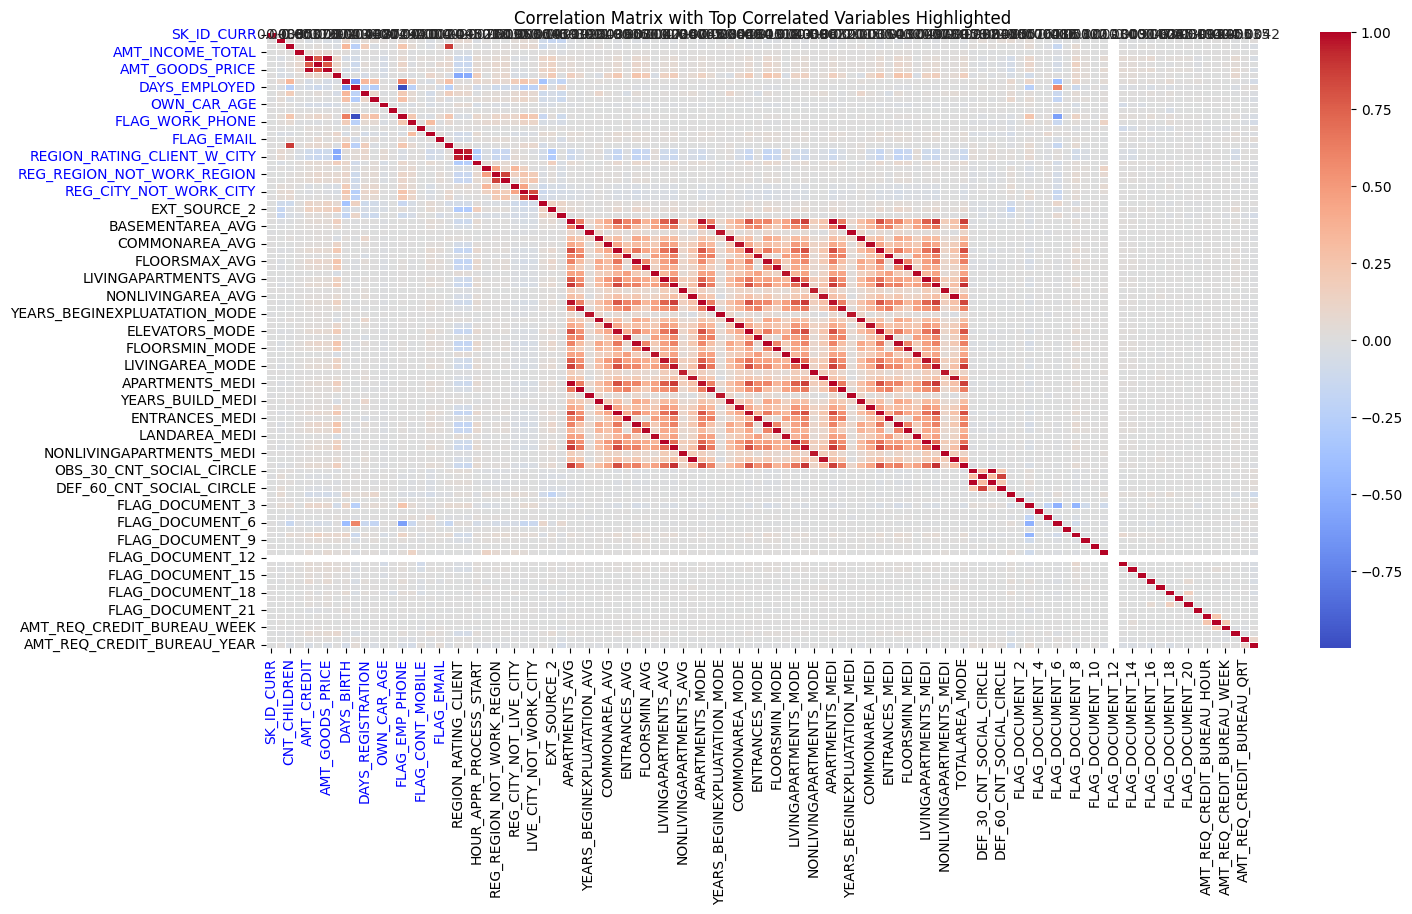

In [61]:
# Segment the dataset based on scenarios (e.g., clients with payment difficulties and all other cases)
scenario_1 = df[df['TARGET'] == 1]  # Clients with payment difficulties
scenario_2 = df[df['TARGET'] == 0]  # All other cases

# Function to calculate top correlations within a scenario
def calculate_top_correlations(data, target_variable, top_n=10):
    correlations = data.corr()[target_variable].abs().sort_values(ascending=False)
    return correlations.head(top_n)

# Calculate top correlations for each scenario
top_correlations_scenario_1 = calculate_top_correlations(scenario_1, 'TARGET')
top_correlations_scenario_2 = calculate_top_correlations(scenario_2, 'TARGET')

# Calculate the correlation matrix for the entire dataset
correlation_matrix = df.corr()

# Plot the heatmap with highlighted top correlated variables for each scenario
plt.figure(figsize=(16, 8))

# Correlation heatmap for the entire dataset
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=.5)

# Highlight top correlated variables for Scenario 1
for variable in top_correlations_scenario_1.index:
    plt.gca().get_xticklabels()[correlation_matrix.columns.get_loc(variable)].set_color('red')
    plt.gca().get_yticklabels()[correlation_matrix.columns.get_loc(variable)].set_color('red')

# Highlight top correlated variables for Scenario 2
for variable in top_correlations_scenario_2.index:
    plt.gca().get_xticklabels()[correlation_matrix.columns.get_loc(variable)].set_color('blue')
    plt.gca().get_yticklabels()[correlation_matrix.columns.get_loc(variable)].set_color('blue')

plt.title('Correlation Matrix with Top Correlated Variables Highlighted')
plt.show()


In [62]:
correlation_matrix = df.corr()
correlation_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.003295,0.005538,-0.003014,-0.000732,-0.002083,-0.000743,0.001979,0.001324,-0.004372,...,0.006486,0.002969,-0.001913,-0.001376,-0.003363,-0.003973,-0.005468,-0.001075,-0.003452,-0.004155
TARGET,0.003295,1.000000,0.026364,0.010894,-0.032428,-0.012399,-0.041296,-0.040799,0.076788,-0.040295,...,-0.005782,0.000505,-0.003526,-0.005770,0.002973,0.010910,0.005230,-0.010362,-0.000736,0.021580
CNT_CHILDREN,0.005538,0.026364,1.000000,0.009589,0.004972,0.026179,0.000253,-0.025556,0.329264,-0.239693,...,-0.000432,-0.001770,0.004948,-0.002802,0.001836,-0.001989,0.000170,-0.012659,-0.008582,-0.038688
AMT_INCOME_TOTAL,-0.003014,0.010894,0.009589,1.000000,0.069316,0.083009,0.069885,0.029841,0.016003,-0.031616,...,-0.000453,0.000146,-0.000731,-0.001025,0.000716,0.000980,0.000264,0.011493,-0.000441,0.001889
AMT_CREDIT,-0.000732,-0.032428,0.004972,0.069316,1.000000,0.769498,0.986607,0.095111,-0.059343,-0.070471,...,0.030904,0.030212,0.024695,-0.017065,-0.000389,0.010153,0.001583,0.059972,0.015426,-0.040825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.003973,0.010910,-0.001989,0.000980,0.010153,0.006488,0.010396,-0.000921,0.001703,0.005066,...,0.006708,0.005775,0.007027,-0.001228,0.240840,1.000000,0.232114,-0.004574,-0.009103,-0.002563
AMT_REQ_CREDIT_BUREAU_WEEK,-0.005468,0.005230,0.000170,0.000264,0.001583,0.018696,0.002033,0.003365,-0.000385,-0.003937,...,-0.009089,-0.004205,0.005628,0.002739,0.010943,0.232114,1.000000,-0.016632,-0.022293,0.015113
AMT_REQ_CREDIT_BUREAU_MON,-0.001075,-0.010362,-0.012659,0.011493,0.059972,0.037945,0.061569,0.072226,0.000246,-0.031138,...,0.006406,-0.002958,-0.003075,-0.003950,0.005682,-0.004574,-0.016632,1.000000,-0.004175,0.002218
AMT_REQ_CREDIT_BUREAU_QRT,-0.003452,-0.000736,-0.008582,-0.000441,0.015426,0.006177,0.016294,-0.007250,-0.015158,0.017291,...,0.000387,-0.002799,-0.002774,-0.000319,0.001251,-0.009103,-0.022293,-0.004175,1.000000,0.096027


In [63]:

# Find the variable pairs with the highest correlation values
highest_correlations = (correlation_matrix.abs().stack()
                        .reset_index()
                        .sort_values(0, ascending=False)
                        .rename(columns={0: 'Correlation'})
                        .query('level_0 != level_1'))  # Exclude self-correlations

# Extract the top correlated variable pairs
top_correlation_pairs = highest_correlations.iloc[0:10]  # Adjust the number as needed

# Extract unique variable pairs with their correlation values
unique_variable_pairs = top_correlation_pairs[['level_0', 'level_1', 'Correlation']].values.tolist()

print("Unique variable pairs with highest correlation:")
for pair in unique_variable_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


Unique variable pairs with highest correlation:
FLAG_EMP_PHONE and DAYS_EMPLOYED: 1.00
DAYS_EMPLOYED and FLAG_EMP_PHONE: 1.00
OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE: 1.00
OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE: 1.00
LIVINGAPARTMENTS_MEDI and LIVINGAPARTMENTS_AVG: 1.00
LIVINGAPARTMENTS_AVG and LIVINGAPARTMENTS_MEDI: 1.00
YEARS_BUILD_MEDI and YEARS_BUILD_AVG: 1.00
YEARS_BUILD_AVG and YEARS_BUILD_MEDI: 1.00
FLOORSMIN_AVG and FLOORSMIN_MEDI: 1.00
FLOORSMIN_MEDI and FLOORSMIN_AVG: 1.00


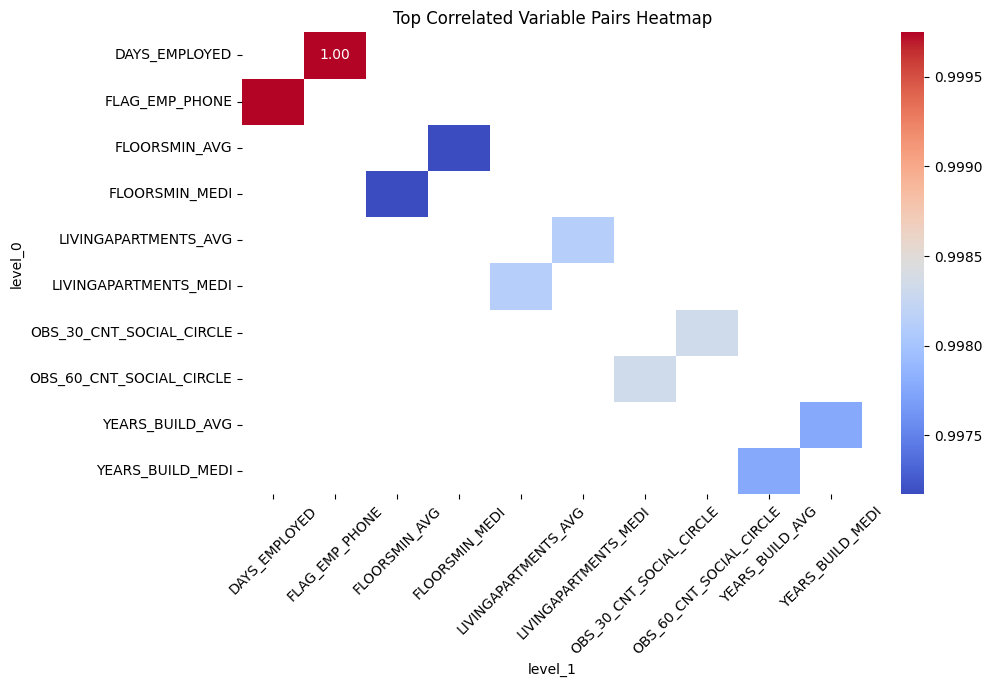

In [64]:

# Find the variable pairs with the highest correlation values
highest_correlations = (correlation_matrix.abs().stack()
                        .reset_index()
                        .sort_values(0, ascending=False)
                        .rename(columns={0: 'Correlation'})
                        .query('level_0 != level_1'))  # Exclude self-correlations

# Extract the top correlated variable pairs
top_correlation_pairs = highest_correlations.iloc[0:10]  # Adjust the number as needed

# Create a heatmap for the top correlated variable pairs with values displayed
plt.figure(figsize=(10, 6))
sns.heatmap(pd.pivot(top_correlation_pairs, 'level_0', 'level_1', 'Correlation'), cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Rotate y-axis labels for better visibility
plt.title('Top Correlated Variable Pairs Heatmap')
plt.show()
